In [0]:
# Import libraries

import initialize
import explore
import preprocess
import predict
import analyze
import helpr
import pandas as pd
import matplotlib.pyplot as plt
import unittest
import warnings
warnings.filterwarnings("ignore")

In [0]:
def bixi_init(datafiles, post_year, city):
    
    # Initialize dataframes for the bixi (and weather) datasets
    
    df_2014, df_2015, df_2016, df_2017 = initialize.init_bixi(city, post_year, datafiles)    
    
    return df_2014, df_2015, df_2016, df_2017

In [0]:
def bixi_predict(df, test_year):
    
    # Feature engineering and normalization, plus splitting data into training and testing sets
    
    df = preprocess.feature_engg(df)

    X_train, X_test, y_train, y_test = preprocess.train_test_splitting(df, test_year)

    X_train, X_test, y_train, y_test, scaler_y = preprocess.feature_norm(X_train, X_test, y_train, y_test)
    
    # Predicting number of trips for the test year

    y_pred_kNN = predict.reg_kNN(X_train, X_test, y_train)
    y_pred_SVR = predict.reg_SVR(X_train, X_test, y_train)
    y_pred_MLP = predict.reg_MLP(X_train, X_test, y_train)
    y_pred_GBR = predict.reg_GBR(X_train, X_test, y_train)
    
    # Error analysis

    analyze.error_MSE(y_test, y_pred_kNN)
    analyze.error_MSE(y_test, y_pred_SVR)
    analyze.error_MSE(y_test, y_pred_MLP)
    analyze.error_MSE(y_test, y_pred_GBR)
    
    # Inverse normalization to get actual prediction
    
    y_pred_SVR = y_pred_SVR.reshape(-1, 1)
    y_pred_MLP = y_pred_MLP.reshape(-1, 1)
    y_pred_GBR = y_pred_GBR.reshape(-1, 1)
    
    y_predicted_kNN = analyze.unnormalize(y_pred_kNN, scaler_y)
    y_predicted_SVR = analyze.unnormalize(y_pred_SVR, scaler_y)
    y_predicted_MLP = analyze.unnormalize(y_pred_MLP, scaler_y)
    y_predicted_GBR = analyze.unnormalize(y_pred_GBR, scaler_y)
    
    # Print/plot total number of trips predicted for the test year
    
    plt.figure(figsize=(17, 10))
    
    plt.subplot(2,2,1)
    plt.plot(y_predicted_kNN)
    plt.title('kNN - Bixi predicted usage for 2017')
    
    plt.subplot(2,2,2)
    plt.plot(y_predicted_SVR)
    plt.title('SVR - Bixi predicted usage for 2017')
    
    plt.subplot(2,2,3)
    plt.plot(y_predicted_MLP)
    plt.title('MLP - Bixi predicted usage for 2017')
    
    plt.subplot(2,2,4)
    plt.plot(y_predicted_GBR)
    plt.title('GBR - Bixi predicted usage for 2017')

In [0]:
def bixi_explore(df_2014, df_2015, df_2016, df_2017):
    
    explore.plot_member(df_2014, df_2015, df_2016, df_2017)
    explore.plot_hourly(df_2014, df_2015, df_2016, df_2017)
    explore.plot_weekly(df_2014, df_2015, df_2016, df_2017)
    explore.plot_monthly(df_2014, df_2015, df_2016, df_2017)
    explore.plot_duration(df_2014, df_2015, df_2016, df_2017)
    explore.plot_temperature(df_2014, df_2015, df_2016, df_2017)
    explore.plot_dur_temp(df_2014, df_2015, df_2016, df_2017)
    explore.plot_weather(df_2014, df_2015, df_2016, df_2017)
    explore.plot_dur_wea(df_2014, df_2015, df_2016, df_2017)
    
    return

In [0]:
def bixi_test():
    
    print('Testing in progress.')
    
    class TestBixiMethods(unittest.TestCase):
    
        def test_initialize(self):
            self.assertTrue(bixi_init(['OD_2014.csv'], 2013, 'Montreal'))
    
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Weather data initialization complete.
Bixi data initialization complete.
Feature engineering complete.
Train-test splitting complete.
Feature normalization complete.
k-nearest neighbours regression complete.
Support vector regression complete.
Multilayer perceptron regression complete.
Gradient boosting regression complete.
Mean squared error: 0.028750
Mean squared error: 0.029613
Mean squared error: 0.050278
Mean squared error: 0.014887
Testing in progress.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


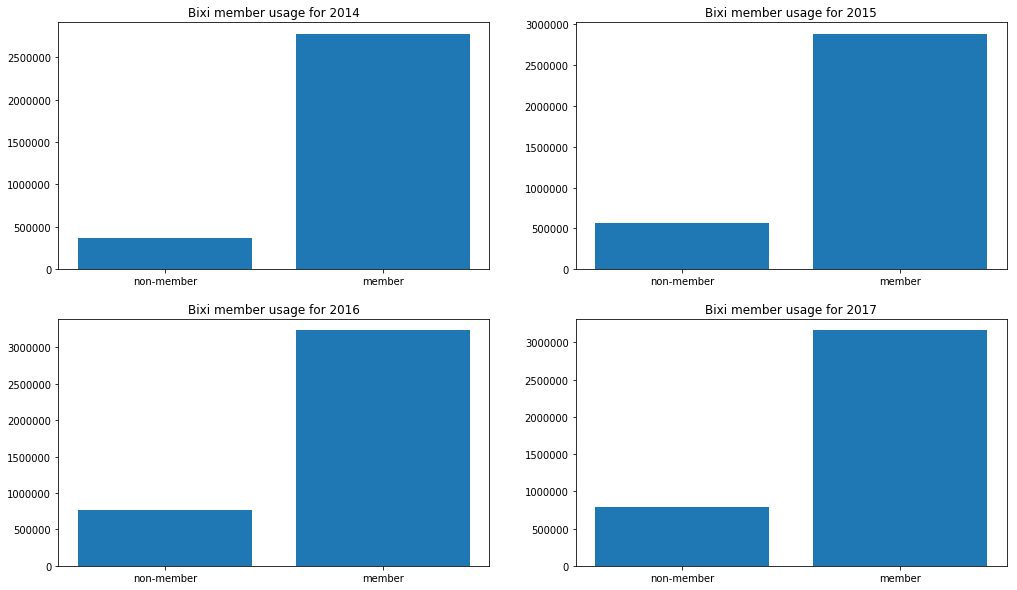

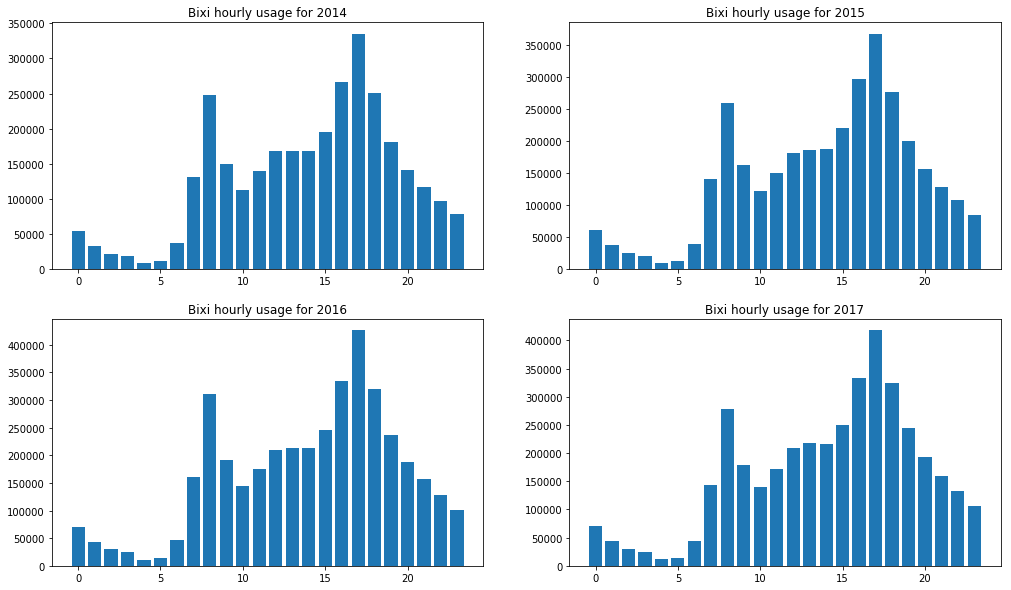

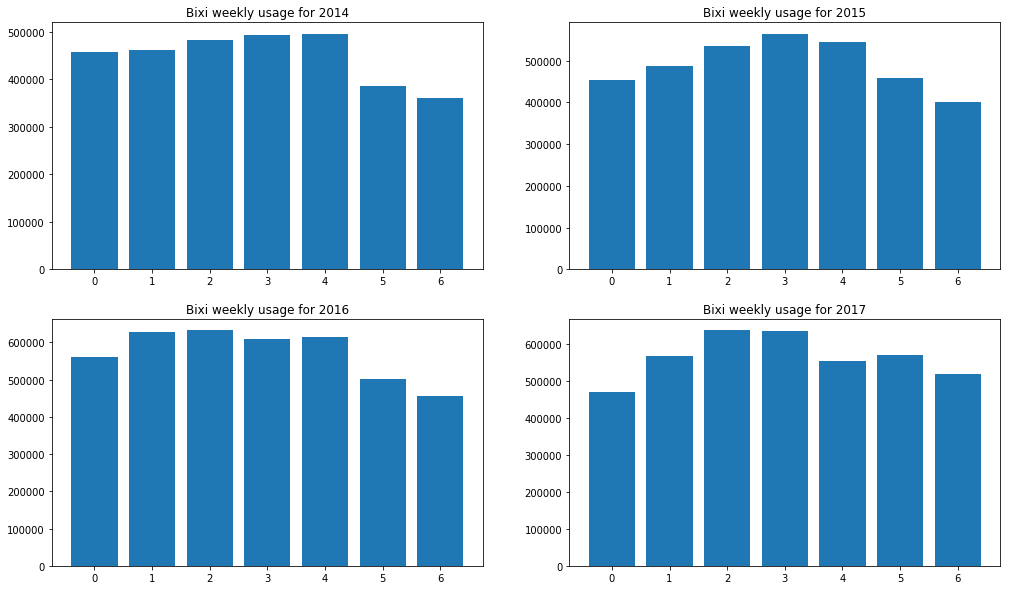

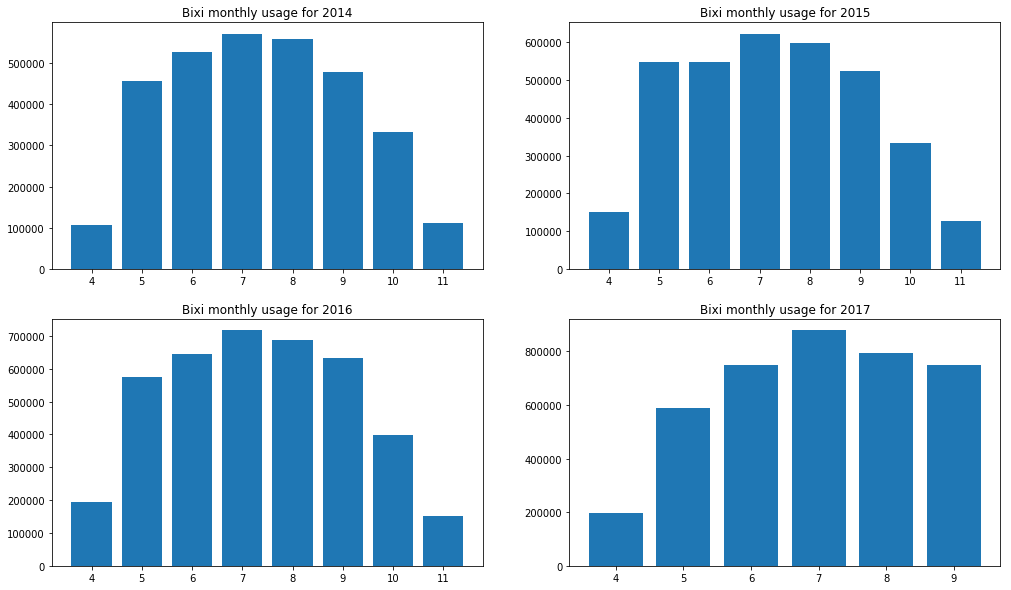

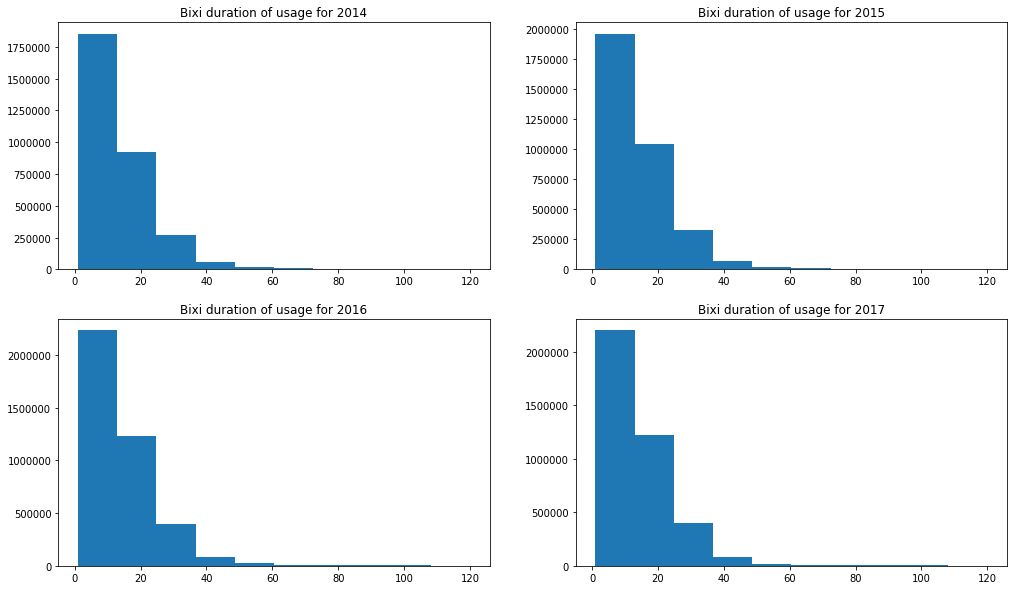

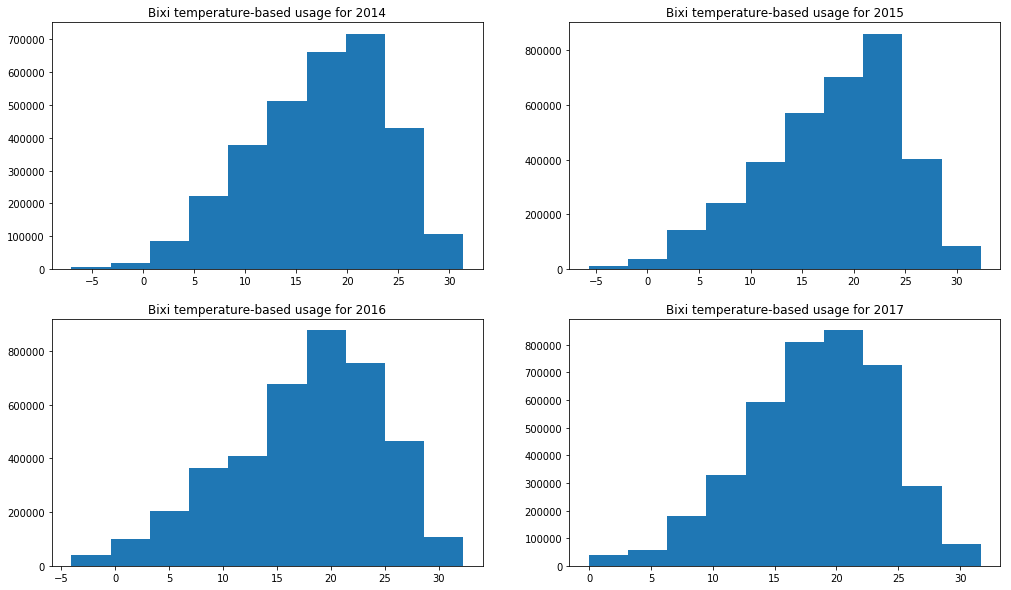

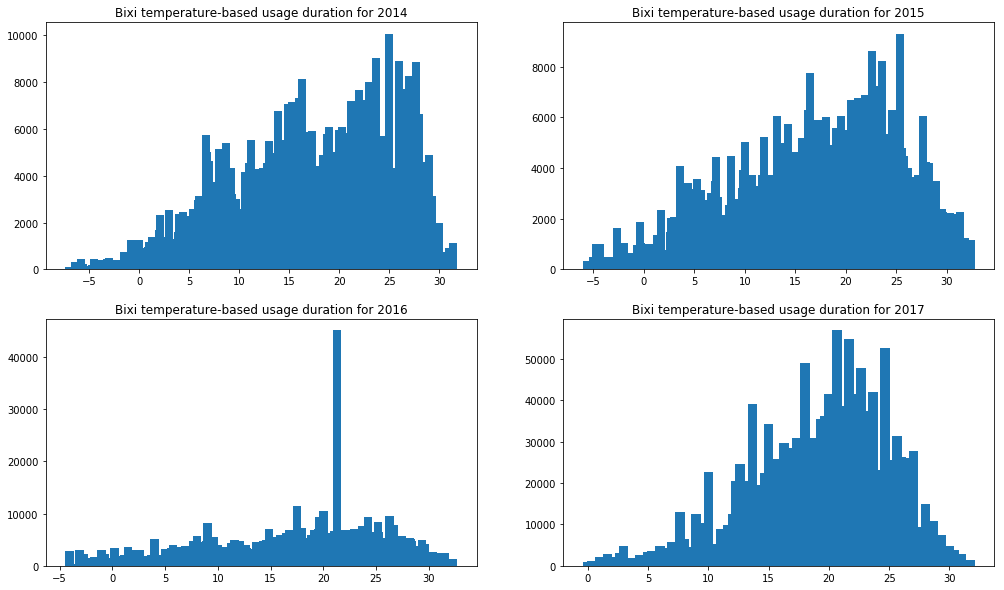

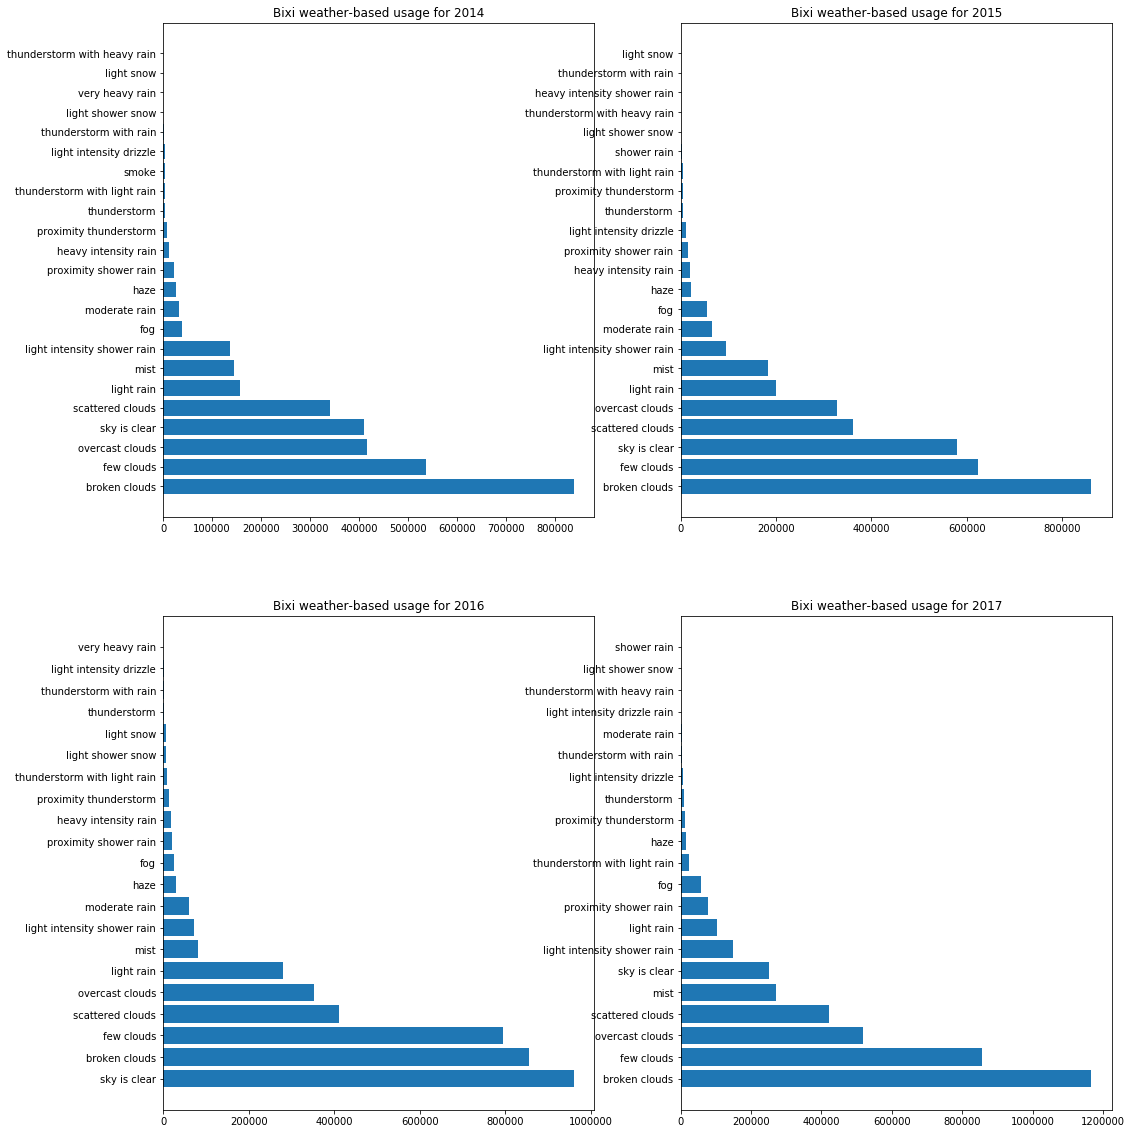

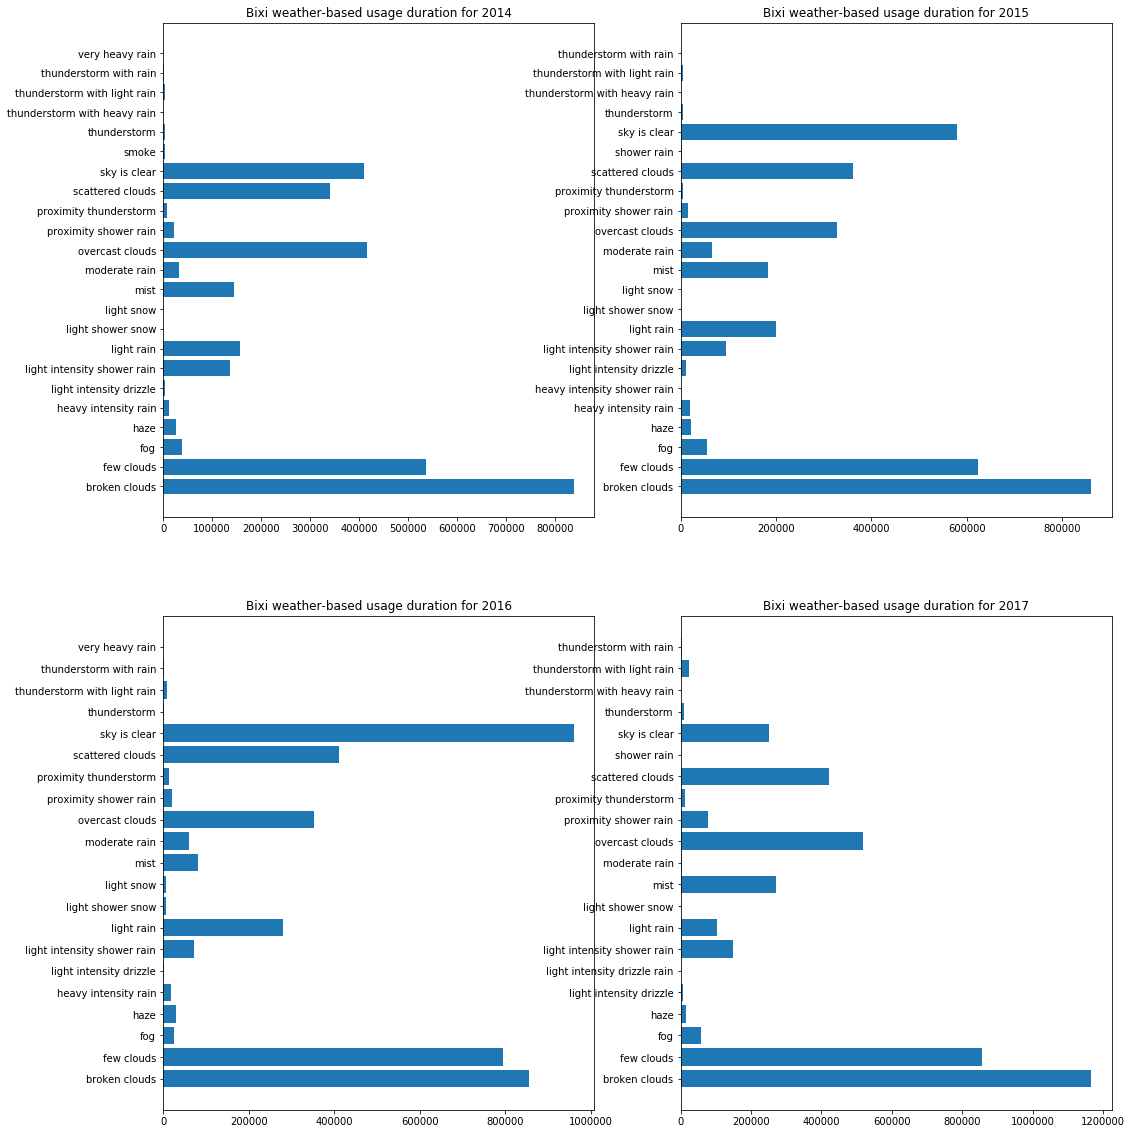

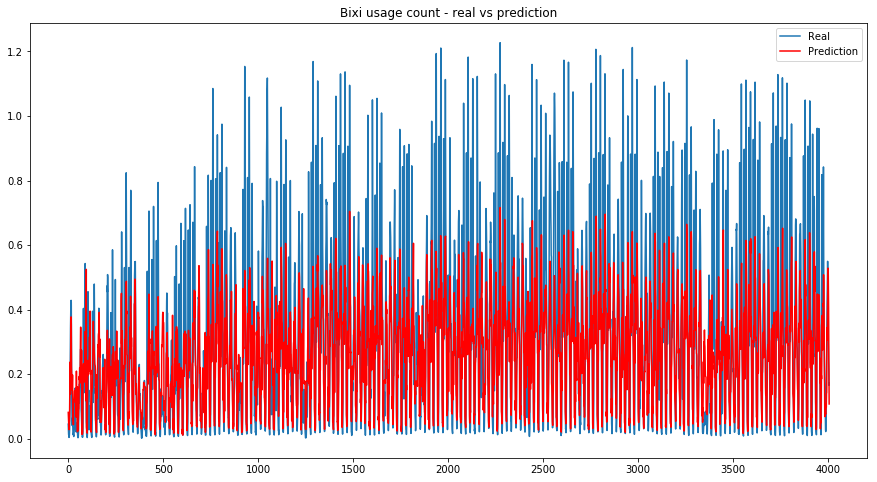

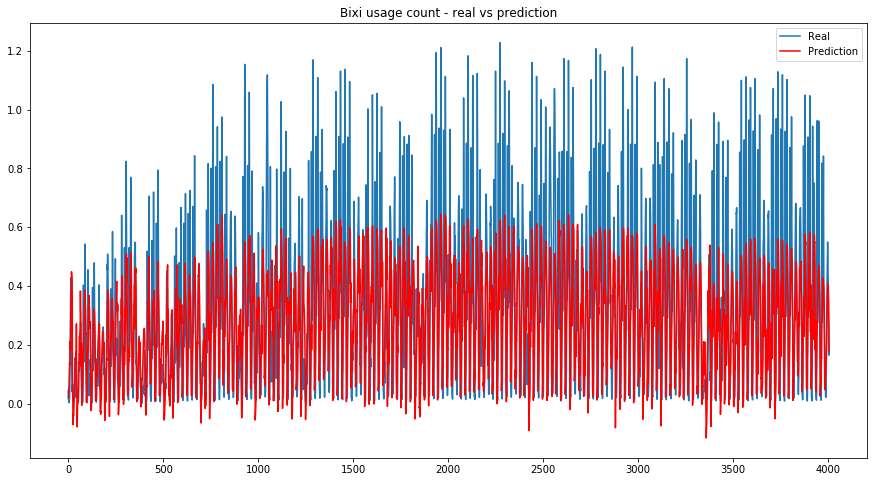

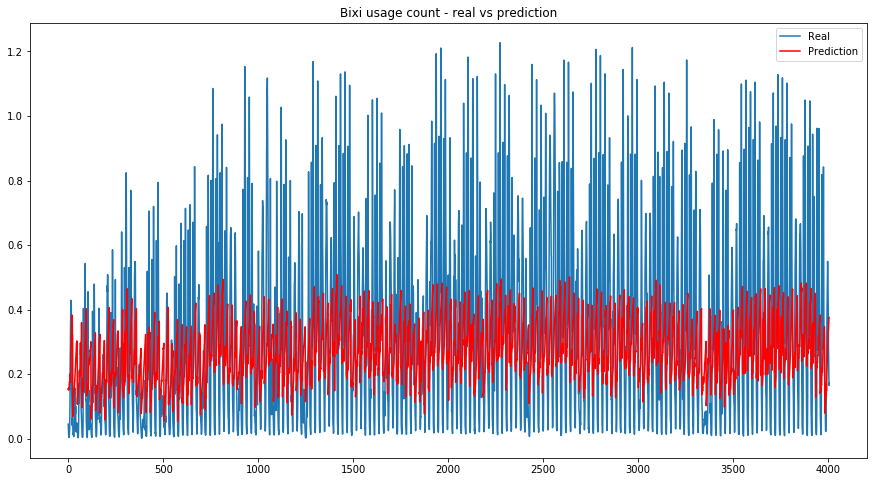

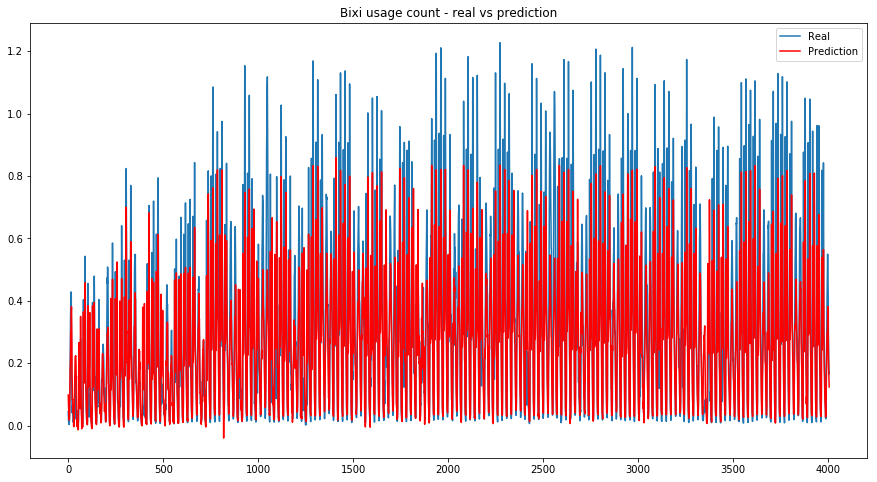

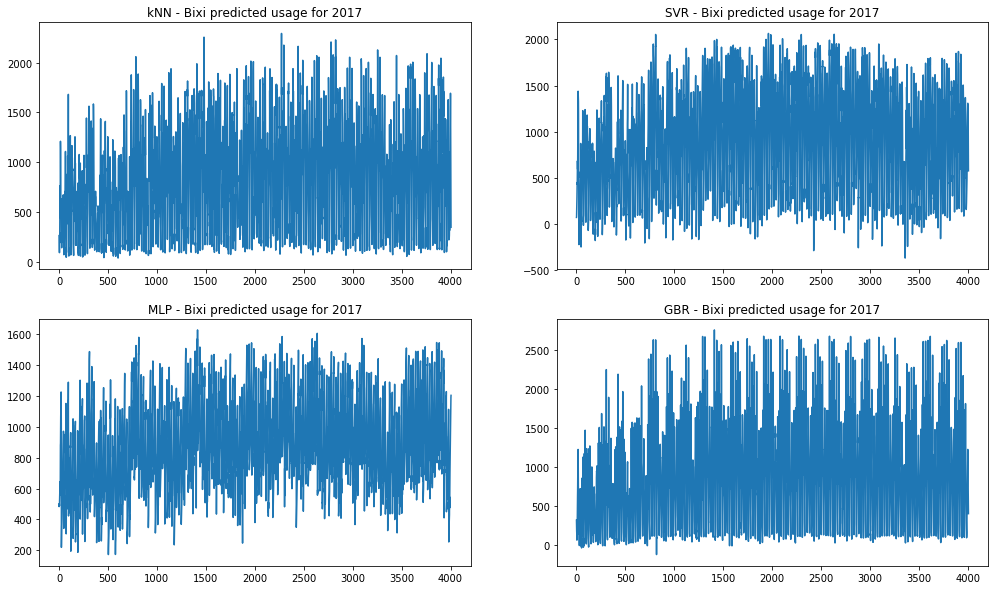

In [8]:
datafiles = ['OD_2014.csv','OD_2015.csv','OD_2016.csv','OD_2017.csv']
post_year = 2013
test_year = 2017
city = 'Montreal'

df_2014, df_2015, df_2016, df_2017 = bixi_init(datafiles, post_year, city)
bixi_explore(df_2014, df_2015, df_2016, df_2017)
df = pd.concat([df_2014, df_2015, df_2016, df_2017], ignore_index=True)
bixi_predict(df, test_year)
bixi_test()